# Data Transformation and Analysis of a Startup
In this project, you’ll work as a data analyst for a tech startup that is looking to improve its operations after a global pandemic has taken the world by storm.

You will apply data transformation techniques to make better sense of the company’s data and help answer important questions such as:
- Is the company in good financial health?
- Does the company need to let go of any employees?
- Should the company allow employees to work from home permanently?

Let’s get started!

## Analyzing Revenue and Expenses

The management team of the company you work for is concerned about the status of the company after a global pandemic.

The CFO (Chief Financial Officer) asks you to perform some data analysis on the past six months of the company’s `financial data`, which has been loaded in the variable financial_data.

First, examine the first few rows of the data using `print()` and `.head()`.

In [8]:
from sklearn import preprocessing
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

# load in financial data
financial_data = pd.read_csv('financial_data.csv')

financial_data.head()

,Month,Revenue,Expenses
0,1,1420000,510000
1,2,1200000,532000
2,3,1050000,551000
3,4,920000,612000
4,5,807000,628000


Notice that `financial_data` has three columns – `Month`, `Revenue`, and `Expenses`.

Store each column in three separate variables called `month`, `revenue`, and `expenses`.

In [11]:
# store each columns in separte variables
month = financial_data['Month']
revenue = financial_data['Revenue']
expenses = financial_data['Expenses']

Next, use the following code to create a plot of revenue over the past six months

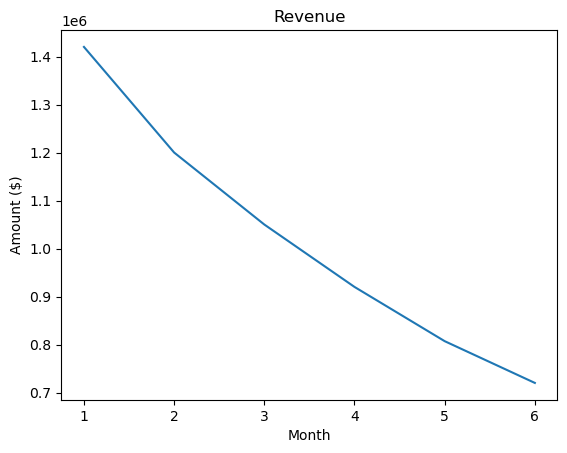

In [14]:
# plot revenue over the past six months
plt.plot(month, revenue)
plt.xlabel('Month')
plt.ylabel('Amount ($)')
plt.title('Revenue')
plt.show()

Create a second plot of monthly expenses over the past 6 months. Note that you’ll need to use the function `plt.clf()` prior to creating this new plot. Otherwise, it will be plotted on-top of the revenue plot. The code should look something like this:

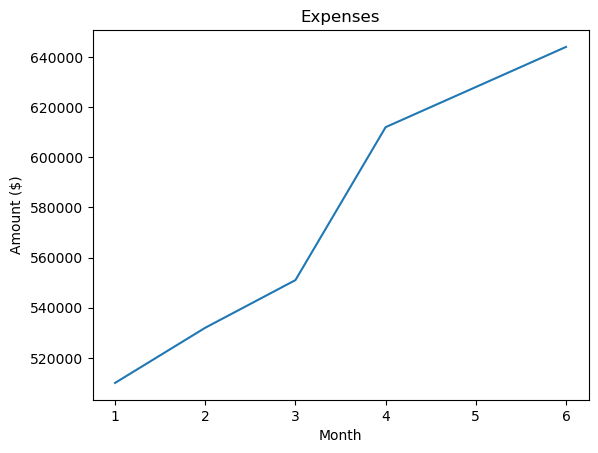

In [18]:
# plot expenses over the past six months
plt.clf()
plt.plot(month, expenses)
plt.xlabel('Month')
plt.ylabel('Amount ($)')
plt.title('Expenses')
plt.show()

As shown, revenue seems to be quickly decreasing while expenses are increasing. If the current trend continues, expenses will soon surpass revenues, putting the company at risk.

After you show this chart to the management team, they are alarmed. They conclude that expenses must be cut immediately and give you a new file to analyze called `expenses.csv`.

Use pandas to read in expenses.csv and store it in a variable called `expense_overview`.

Print the first seven rows of the data.

In [23]:
expense_overview = pd.read_csv('expenses.csv')
expense_overview.head(7)

,Expense,Proportion
0,Salaries,0.62
1,Advertising,0.15
2,Office Rent,0.15
3,Equipment,0.03
4,Utilities,0.03
5,Supples,0.01
6,Food,0.01


## Pie Chart and Collapsing Categories

Notice that there are two columns: 

- `Expense:` indicates the expense category
- `Proportion:` indicates how much of the overall expenses a specific category takes up

Store the `Expense` column in a variable called `expense_categories` and the `Proportion` column in a variable called `proportions`.

In [29]:
expense_category = expense_overview['Expense']
proportions = expense_overview['Proportion']


Next, we want to create a pie chart of the different expense categories. Use `plt.clf()` again to clear the previous plot, then create a pie chart using the `plt.pie()` method, passing in two arguments:

- `proportions`
- `labels` = expense_categories

Give your pie chart a title using `plt.title()`, then use `plt.show()` at the end to show the plot.

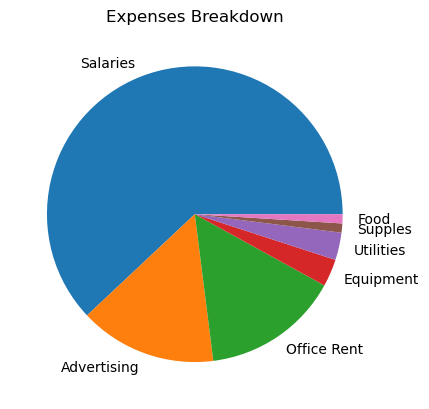

In [38]:
plt.clf()
plt.pie(proportions, labels=expense_category)
plt.title('Expenses Breakdown')
plt.show()


Notice that the pie chart currently looks deformed.

Above `plt.show()`, add in the following two lines of code to set the axis and adjust the spacing:

```
plt.axis('Equal')
plt.tight_layout()
```

Take a moment to look at the pie chart. Which expense categories make up most of the data, and which ones aren’t so significant?

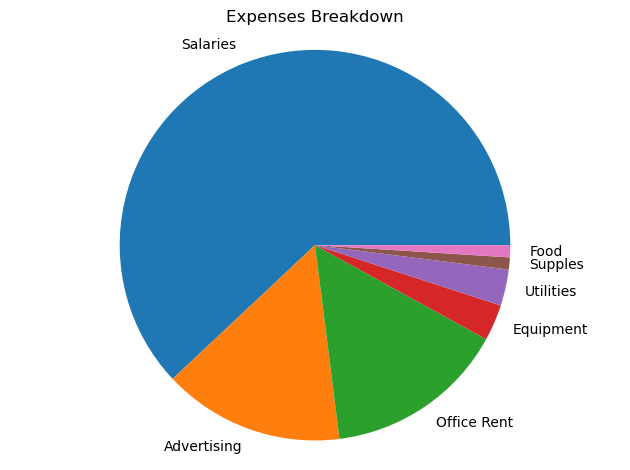

In [41]:
plt.clf()
plt.pie(proportions, labels=expense_category)
plt.title('Expenses Breakdown')
plt.axis('equal')
plt.tight_layout()
plt.show()


It seems that `Salaries`, `Advertising`, and `Office Rent` make up most of the expenses, while the rest of the categories make up a small percentage.

Before you hand this pie chart back to management, you would like to update the pie chart so that all categories making up less than 5% of the overall expenses (`Equipment`, `Utilities`, `Supplies`, and `Food`) are collapsed into an “Other” category.

Update the pie chart accordingly.

In [44]:
expense_overview_2 = expense_overview[expense_overview['Proportion'] >= 0.05]

other_category = expense_overview[expense_overview['Proportion'] < 0.05]

other_value = np.round(other_category['Proportion'].sum(), 2)

expense_overview_3 = pd.DataFrame({
  'Expense': ['Other'],
  'Proportion': [other_value]
})

new_expense_overview = pd.concat([expense_overview_2, expense_overview_3]).reset_index(drop=True)
new_expense_overview

,Expense,Proportion
0,Salaries,0.62
1,Advertising,0.15
2,Office Rent,0.15
3,Other,0.08


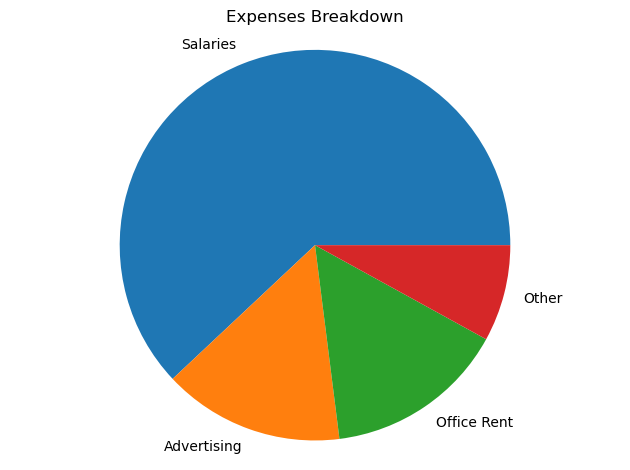

In [46]:
plt.clf()
plt.pie(new_expense_overview['Proportion'], labels=new_expense_overview['Expense'])
plt.title('Expenses Breakdown')
plt.axis('equal')
plt.tight_layout()
plt.show()

You should now see four categories in your updated pie chart:

- Salaries
- Advertising
- Office Rent
- Other

This simplified pie chart helps the management team see a big picture view of the company’s expenses without getting distracted by noisy data.

If the company wants to cut costs in a big way, which category do you think they should focus on? Put your answer in a string variable called `expense_cut`.

In [49]:
expense_cut = 'Salaries'

## Employee Productivity

Salaries make up 62% of expenses. The management team determines that to cut costs in a meaningful way, they must let go of some employees.

Each employee at the company is assigned a productivity score based on their work. The management would like to keep the most highly productive employees and let go of the least productive employees.

First, use pandas to load in `employees.csv` and store it in a variable called `employees`.

Print the first few rows of the data.

In [55]:
employees = pd.read_csv('employees.csv')
employees.head()

,Name,Salary,Productivity,Commute Time
0,Mason Pender,87902,29.91,16.79
1,Mia Rew,95672,49.91,44.48
2,Jalisa Kroenke,177864,78.00,19.40
3,Krystal Homeyer,186643,24.36,42.06
4,Kiana Wishart,167148,4.08,25.58


Notice that there is a `Productivity` column, which indicates the productivity score assigned to that employee.

Sort the `employees` data frame (in ascending order) by the `Productivity` column and store the result in a variable called `sorted_productivity`.

In [58]:
sorted_productivity = employees.sort_values(by=['Productivity'])
sorted_productivity

,Name,Salary,Productivity,Commute Time
259,Wilber Rye,111647,0.06,49.42
92,Fredric Gandee,154469,0.24,22.48
252,Johnson Fordham,168684,1.46,22.39
178,Lilia Lemoine,167579,1.67,27.36
162,Hilma Laughton,85506,1.79,36.41
...,...,...,...,...
164,Miki Hartle,50856,99.54,31.39
88,Darell Nau,30530,99.63,44.25
23,Joaquina Neece,95562,99.66,48.65
202,Janae Officer,110139,99.69,15.45


You should now see the employees with the lowest productivity scores at the top of the data frame.

The company decides to let go of the 100 least productive employees.

Store the first 100 rows of `sorted_productivity` in a new variable called `employees_cut` and print out the result.

Unfortunately, this batch of employees won’t be so lucky.

In [61]:
employees_cut = sorted_productivity[:100]
employees_cut

,Name,Salary,Productivity,Commute Time
259,Wilber Rye,111647,0.06,49.42
92,Fredric Gandee,154469,0.24,22.48
252,Johnson Fordham,168684,1.46,22.39
178,Lilia Lemoine,167579,1.67,27.36
162,Hilma Laughton,85506,1.79,36.41
...,...,...,...,...
43,Bernardo Klingenberg,55464,34.52,32.27
186,Ashleigh Istre,178627,34.70,38.67
288,Penni Kimbrough,142680,35.21,49.64
269,Margot Mackenzie,114302,35.79,19.87


Your colleague Sarah, a data scientist at the company, would like to explore the relationship between `Income` and `Productivity` more in depth, but she points out that these two features are on vastly different scales.

For example, productivity is a feature that ranges from 0-100, but income is measured in the thousands of dollars.

Moreover, there are outliers in the data that add an additional layer of complexity.

She asks you for advice on how she should transform the data. Should she perform normalization, standardization, log transformation, or something else?

Put your answer in a string in a variable called `transformation`.

In [64]:
transformation = 'log'

Given the context, Sarah might want to start with **standardization** to bring both features to a comparable scale. If the data has **significant skewness** or **outliers**, she can also consider **log transformation** to address those issues.

## Commute Times and Log Transformation

The COO (Chief Operating Officer) is debating whether to allow employees to continue to work from home post-pandemic.

He first wants to take a look at roughly how long the average commute time is for employees at the company. He asks for your help to analyze this data.

The `employees` data frame has a column called `Commute Time` that stores the commute time (in minutes) for each employee.

Create a variable called `commute_times` that stores the `Commute Time` column.

In [69]:
commute_times = employees['Commute Time']

Let’s do some quick analysis on the commute times of employees.

Use print() and `.describe()` to print out descriptive statistics for `commute_times`.

What are the average and median commute times? Might it be worth it for the company to explore allowing remote work indefinitely so employees can save time during the day?

In [72]:
commute_times.describe()

count    300.000000
mean      33.441700
std       16.128369
min        3.220000
25%       21.667500
50%       31.060000
75%       42.190000
max      101.780000
Name: Commute Time, dtype: float64

Let’s explore the shape of the commute time data using a histogram.

First, use `plt.clf()` to clear the previous plots. Then use `plt.hist()` to plot the histogram of `commute_times`. Finally, use `plt.show()` to show the plot. Feel free to add labels above plt.show() if you would like to practice!

What do you notice about the shape of the data? Is it symmetric, left skewed, or right skewed?

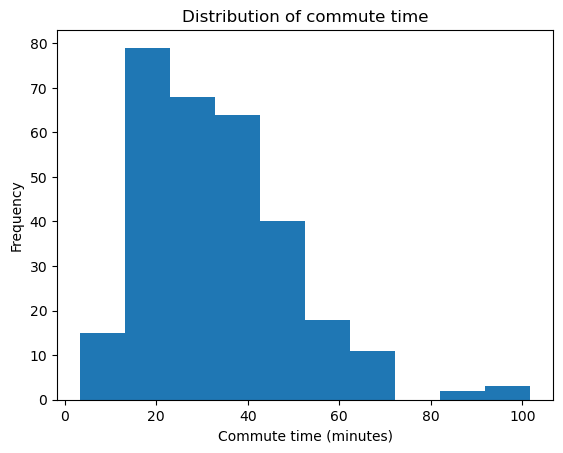

In [87]:
plt.clf()
plt.hist(commute_times)
plt.title('Distribution of commute time')
plt.xlabel('Commute time (minutes)')
plt.ylabel('Frequency')
plt.show()

The data seems to be skewed to the right. To make it more symmetrical, we might try applying a log transformation.

Create a variable called `commute_times_log` that stores a log-transformed version of commute_times.

To apply log-transform, you can use numpy’s `log()` function.

In [78]:
commute_times_log = np.log(commute_times)

Replace the histogram for `commute_times` with one for `commute_times_log`.

Notice how the shape of the data changes from being right skewed to a more symmetrical (and even slightly left-skewed) in shape. After applying log transformation, the transformed data is more “normal” than before.

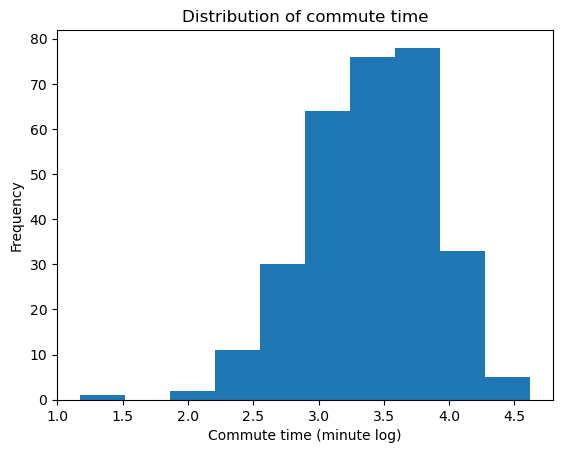

In [89]:
plt.clf()
plt.hist(commute_times_log)
plt.title('Distribution of commute time')
plt.xlabel('Commute time (minute log)')
plt.ylabel('Frequency')
plt.show()